# 实验项目名称：聚类分析
## 实验目的及要求：
* 掌握聚类的概念
* 掌握k-means算法的原理
* 掌握DBSCAN算法的原理
* 掌握聚类模型的构建方法
* 了解sklearn估计器的用法

## 实验内容：
* 读取load_diabetes数据集、查看数据表的基本信息
* 使用TSNE函数对聚类之前数据进行可视化
* 分别采用k-means和DBSCAN对数据集进行聚类模型训练
* 采用聚类评价指标对两种模型的聚类结果进行评价
* 使用TSNE函数对最优聚类数目的聚类结果进行可视化

模型详细参数可参考    
https://scikit-learn.org/stable/

## 实验步骤及结果：

###  1. 加载数据集，读取数据集load_diabetes，了解数据
1. 获取数据
Sklearn库的datasets模块集成了部分数据分析的经典数据集，可以使用这些数据集进行数据预处理、建模等操作。可以通过数据集加载函数加载load_diabetes数据集。  


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

data_row=datasets.load_diabetes()
data=data_row['data']
target=data_row['target']
feature=data_row['feature_names']

df=pd.DataFrame(data,columns=feature)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


### 数据说明

'DESCR':  
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.  

对442例糖尿病患者，分别获得了10个基线变量:年龄、性别、体重指数、平均血压和6个血清测量值，以及兴趣反应（基线后一年疾病进展的定量测量）。

**数据集特征：**

实例数：442

属性数：前10列是数值预测值

目标：第11列是基线检查后一年疾病进展的定量测量

属性信息：

- age   年龄（以年为单位）
- sex   性别
- bmi   体重指数
- bp    血压平均值
- s1    tc，T细胞（一种白细胞）
- s2    低密度脂蛋白
- s3    高密度脂蛋白，高密度脂蛋白
- s4    tch，促甲状腺激素
- s5    ltg，拉莫三嗪
- s6    血糖，血糖水平  
注：这10个特征变量中的每一个都以平均值为中心，并按标准差乘以“n_samples”（即每列的平方和总计为1）进行缩放。

###  2.数据集可视化

In [3]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2,init='random',random_state=177,learning_rate='auto').fit(data)
df_reduction=pd.DataFrame(tsne.embedding_)
df_reduction

,0,1
0,-4.358683,-6.447713
1,16.060295,-0.982086
2,-4.016613,-7.274850
3,12.561314,15.623163
4,9.880372,7.702900
...,...,...
437,-9.098851,-3.830441
438,-15.857332,-8.429101
439,-4.830535,-10.559640
440,10.388196,15.103330


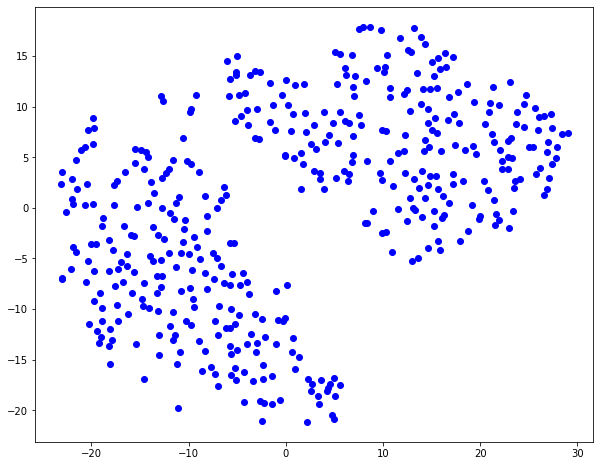

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(x=df_reduction[0],y=df_reduction[1],c='b')

### 3.建立K-Means聚类模型、评价聚类模型选择最优聚类簇数目

[0.23698717031681765, 0.15322276171472807, 0.13959155070318371, 0.14341202499529812, 0.14422229812488338]
[172.2165004345374, 117.46503335633265, 98.42599618837929, 87.4510908318759, 80.13133582566698]
[7.187000018583656, 6.514029002169369, 5.973178069303466, 5.554112564296046, 5.211217586337415]


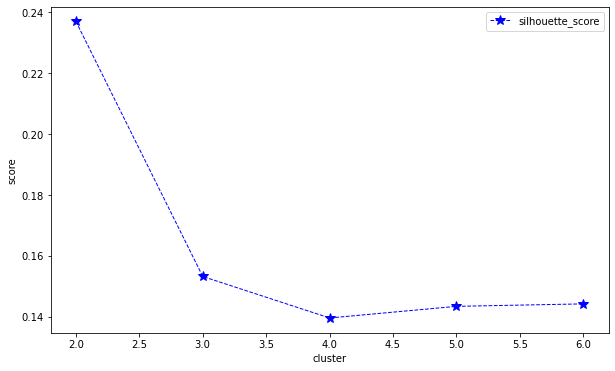

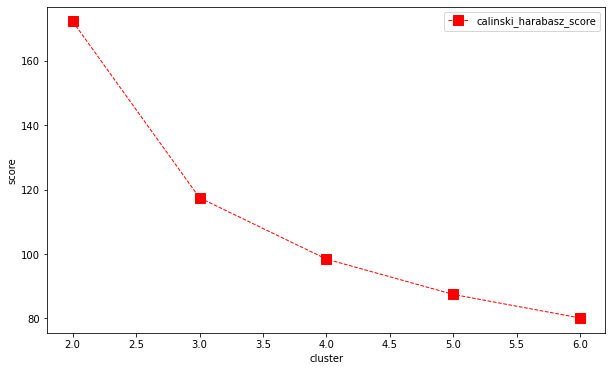

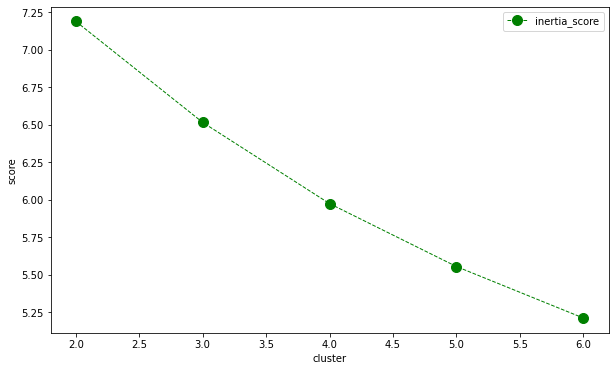

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

silh_score=[]
cali_score=[]
inertia_score=[]
for i in range(2,7):
    kmeans=KMeans(n_clusters=i,random_state=123).fit(data)
    score=silhouette_score(data,kmeans.labels_)
    silh_score.append(score)
    score=calinski_harabasz_score(data,kmeans.labels_)
    cali_score.append(score)
    score=kmeans.inertia_
    inertia_score.append(score)

print(silh_score)
print(cali_score)
print(inertia_score)

plt.figure(figsize=(10,6))
plt.plot(range(2,7),silh_score,'b*--',linewidth=1,markersize=10,label='silhouette_score')
plt.legend()
plt.xlabel('cluster')
plt.ylabel('score')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(range(2,7),cali_score,'rs--',linewidth=1,markersize=10,label='calinski_harabasz_score')
plt.legend()
plt.xlabel('cluster')
plt.ylabel('score')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(range(2,7),inertia_score,'go--',linewidth=1,markersize=10,label='inertia_score')
plt.legend()
plt.xlabel('cluster')
plt.ylabel('score')
plt.show()

原始数据集K-Means聚类后质心为 [[ 0.01675864  0.0151435   0.02362297  0.02055863  0.02419395  0.02588059
  -0.02476659  0.03336044  0.02998366  0.02453796]
 [-0.017855   -0.0161342  -0.0251684  -0.02190358 -0.02577673 -0.02757372
   0.02638684 -0.03554289 -0.03194521 -0.02614325]] 

TSNE降维,K-Means聚类后质心为 [[ 12.892363    6.958524 ]
 [-10.434267   -6.5427065]]


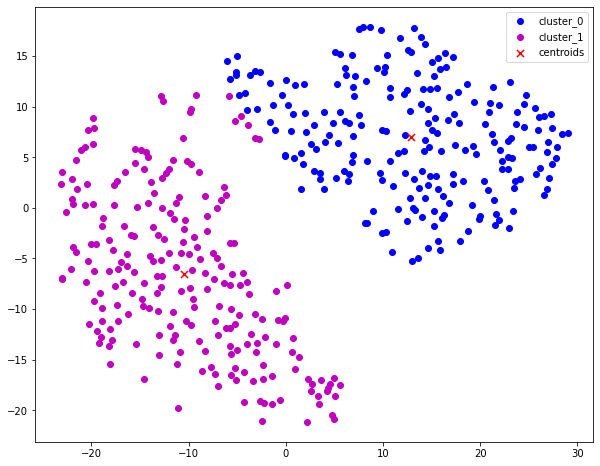

(442, 3)


In [6]:
kmeans_row=KMeans(n_clusters=2,random_state=123).fit(data)
centroids_row=kmeans_row.cluster_centers_
print("原始数据集K-Means聚类后质心为",centroids_row,'\n')

kmeans=KMeans(n_clusters=2,random_state=123).fit(df_reduction)
centroids=kmeans.cluster_centers_
print("TSNE降维,K-Means聚类后质心为",centroids)

df_reduction['label']=kmeans.labels_
cluster_0=df_reduction[df_reduction['label']==0]
cluster_1=df_reduction[df_reduction['label']==1]

plt.figure(figsize=(10,8))
plt.scatter(x=cluster_0[0],y=cluster_0[1],c='b',label='cluster_0')
plt.scatter(x=cluster_1[0],y=cluster_1[1],c='m',label='cluster_1')
plt.scatter(centroids[:,0],centroids[:,1],marker='x',color='red',s=50,label='centroids')

plt.legend()
plt.show()
print(df_reduction.shape)

### 4.建立DBSCAN聚类模型、评价聚类模型选择最优聚类簇数目

In [7]:
from sklearn.cluster import DBSCAN

for i in np.arange(0.09,0.11,0.001):
    for j in np.arange(3,10):
        DB=DBSCAN(eps=i,min_samples=j).fit(data)
        labels=DB.labels_
        n_clusters_=len(set(labels))-(1 if -1 in labels else 0)
        n_noise_=list(labels).count(-1)
        if n_clusters_==2 and n_noise_<=30:
            print("参数eps={},min_samples={}".format(i,j))
            print("聚类之后的簇数目有{}个".format(n_clusters_))
            print("噪声数据有{}个".format(n_noise_))
            silh_score=silhouette_score(data,DB.labels_)
            cali_score=calinski_harabasz_score(data,DB.labels_)          
            print("silhouette方法得分为",silh_score)
            print("calinski_harabasz方法得分为",cali_score)
            print("---------------------------------------")

参数eps=0.1,min_samples=3
聚类之后的簇数目有2个
噪声数据有29个
silhouette方法得分为 0.13312669910859978
calinski_harabasz方法得分为 41.015143680308
---------------------------------------
参数eps=0.101,min_samples=3
聚类之后的簇数目有2个
噪声数据有25个
silhouette方法得分为 0.13710014170689946
calinski_harabasz方法得分为 39.996303511103214
---------------------------------------
参数eps=0.101,min_samples=4
聚类之后的簇数目有2个
噪声数据有28个
silhouette方法得分为 0.13546624305434993
calinski_harabasz方法得分为 41.464302017817985
---------------------------------------


### 5. 对最优聚类数目的聚类结果进行可视化

聚类之后的簇数目有2个
噪声数据有28个


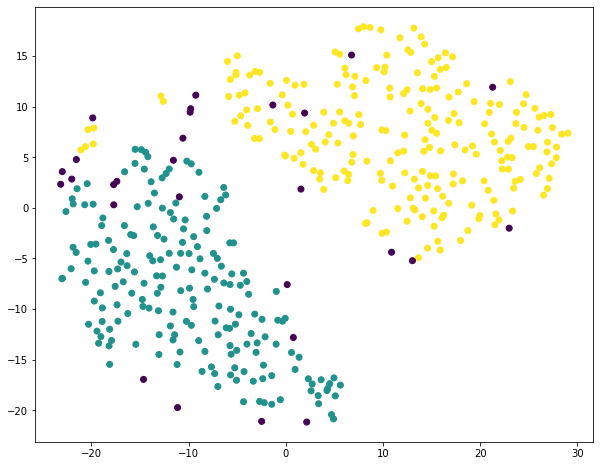

In [8]:
DB=DBSCAN(eps=0.101,min_samples=4).fit(data)
labels=DB.labels_
n_clusters_=len(set(labels))-(1 if -1 in labels else 0)
n_noise_=list(labels).count(-1)
print("聚类之后的簇数目有{}个".format(n_clusters_))
print("噪声数据有{}个".format(n_noise_))
plt.figure(figsize=(10,8))
plt.scatter(x=pd.DataFrame(tsne.embedding_)[:][0],y=pd.DataFrame(tsne.embedding_)[:][1],c=DB.labels_)

### 6.K-Means划分为2个簇后每个点的簇分类情况

In [9]:
kmeans_label_Series=pd.Series(kmeans_row.labels_)
kmeans_label_Series

0      0
1      1
2      0
3      0
4      1
      ..
437    0
438    0
439    1
440    0
441    1
Length: 442, dtype: int32

* 每个簇中的样本各有多少

In [10]:
kmeans_label_Series.value_counts().sort_index()

0    228
1    214
dtype: int64

* 簇质心的情况

In [11]:
centers=pd.DataFrame(kmeans_row.cluster_centers_,columns=feature)
centers

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.016759,0.015143,0.023623,0.020559,0.024194,0.025881,-0.024767,0.033360,0.029984,0.024538
1,-0.017855,-0.016134,-0.025168,-0.021904,-0.025777,-0.027574,0.026387,-0.035543,-0.031945,-0.026143


* 对每个簇质心的值降序排列

In [12]:
centers_t=centers.T
centers_t.columns=pd.Series(['cluster_0','cluster_1'])
centers_t

,cluster_0,cluster_1
age,0.016759,-0.017855
sex,0.015143,-0.016134
bmi,0.023623,-0.025168
bp,0.020559,-0.021904
s1,0.024194,-0.025777
s2,0.025881,-0.027574
s3,-0.024767,0.026387
s4,0.033360,-0.035543
s5,0.029984,-0.031945
s6,0.024538,-0.026143


In [13]:
centers_t['cluster_0'].sort_values(ascending=False,inplace=False)

s4     0.033360
s5     0.029984
s2     0.025881
s6     0.024538
s1     0.024194
bmi    0.023623
bp     0.020559
age    0.016759
sex    0.015143
s3    -0.024767
Name: cluster_0, dtype: float64

In [14]:
centers_t['cluster_1'].sort_values(ascending=False,inplace=False)

s3     0.026387
sex   -0.016134
age   -0.017855
bp    -0.021904
bmi   -0.025168
s1    -0.025777
s6    -0.026143
s2    -0.027574
s5    -0.031945
s4    -0.035543
Name: cluster_1, dtype: float64

## 实验结果分析:   

1.最终确定的最优聚类簇数目及理由？

最终确定的最优聚类簇数目为2个  
理由如下：  
- 根据轮廓系数(silhouette_score)评价k-means聚类模型，该值是簇密度与分散程度的评价指标，区间为[-1,1]之间，该值越接近1，簇越紧凑，聚类越好
- 根据CH指标评价k-means聚类模型，值越大表示聚类效果越好
- 根据误差平方和评价k-means聚类模型，数值趋于稳定时达到最优  
### 总结：综合以上三个系数，选择最优的聚类簇数目为2

2.结合数据集分析两种聚类方法的优缺点和运用场景？

- K-Means
    - 优点：
        1. 原理简单，实现容易，收敛速度快
        2. 聚类效果较优
        3. 算法的可解释度比较强
        4. 主要需要调参的参数仅仅是簇数k
    - 缺点：
        1. K均值很难处理非球形的簇和不同大小的簇
        2. 对噪声、异常点比较敏感
        3. 如果各隐含类别的数据不平衡，比如各隐含类别的数据量严重失衡，或者各隐含类别的方差不同，则聚类效果不佳
        4. 采用迭代方法，得到的结果只是局部最优
        5. 初始质心的选取对聚类结果有很大影响
    - 运用场景：球形分布的簇，大小相近的簇
    
- DBSCAN
    - 优点：
        1. DBSCAN能剔除噪声，对数据集中的异常点不敏感，自动确定簇个数
        2. 可以对任意形状的稠密数据集进行聚类
        3. 聚类结果没有偏倚
    - 缺点：
        1. 如果样本集的密度不均匀、聚类间距差相差很大时，聚类质量较差
        2. 如果样本集较大时，聚类收敛时间较长
        3. 调参稍复杂，主要需要对距离阈值ϵ，邻域样本数阈值MinPts联合调参，不同的参数组合对最后的聚类效果有较大影响
    - 运用场景：数据集密度较为均匀，聚类间距相差不大

3.结合划分簇的质心取值，从医学角度分析聚类结果意义？

共10个指标：年龄、性别、体重指数、平均血压和6个血清测量值，从聚类结果来看，这442例患者的测量指标主要可以分为2类
- 一类的质心取值为	0.016759	0.015143	0.023623	0.020559	0.024194	0.025881	-0.024767	0.033360	0.029984	0.024538，表明年龄在这442例患者中在平均年龄再往上百分之1.6的患者，性别偏男性（或女性）的多百分之1.5的患者等等指标聚为一类
- 另一类的质心取值为 -0.017855	-0.016134	-0.025168	-0.021904	-0.025777	-0.027574	0.026387	-0.035543	-0.031945	-0.026143，明年龄在这这442例患者中在平均年龄再往下百分之1.7的患者，性别偏女性（或男性）的少百分之1.6的患者等等指标聚为一类

## 实验环境：
Anaconda Jupyter notebook、sklearn、matplotlib

## 教师评语: